    Iterasi         x  Selisih |x - g(x)|
0         0  2.000000        0.000000e+00
1         1  1.500000        5.000000e-01
2         2  1.281250        2.187500e-01
3         3  1.205200        7.604980e-02
4         4  1.181563        2.363676e-02
5         5  1.174512        7.051919e-03
6         6  1.172435        2.076856e-03
7         7  1.171825        6.092837e-04
8         8  1.171647        1.785399e-04
9         9  1.171595        5.230042e-05
10       10  1.171579        1.531906e-05
11       11  1.171575        4.486904e-06
12       12  1.171573        1.314188e-06
13       13  1.171573        3.849172e-07


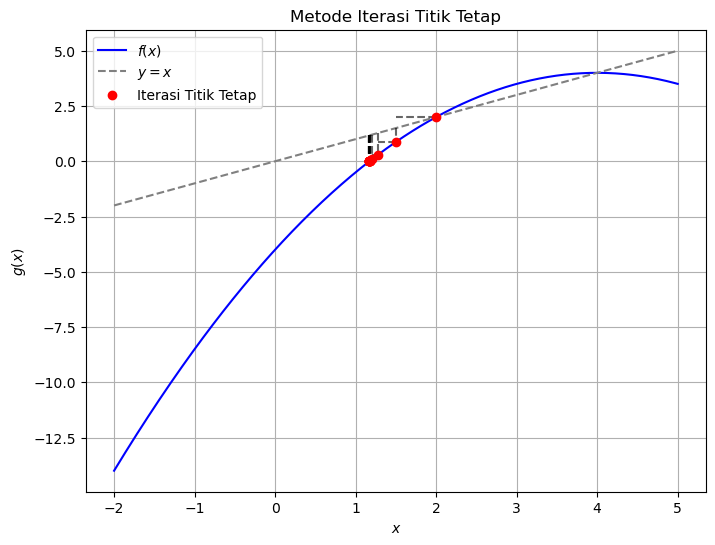

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, h, x0, tol=1e-6, max_iterasi=100):
    # Definisi fungsi dengan parameter:
    # g: fungsi yang ingin diuji untuk titik tetap (tetapi tidak dipakai di dalam tubuh fungsi ini)
    # h: fungsi iterasi yang digunakan untuk menghitung nilai baru dari x (fungsi transformasi)
    # x0: nilai awal dari x
    # tol: toleransi kesalahan yang digunakan untuk menghentikan iterasi ketika perubahan nilai x kecil
    # max_iterasi: jumlah maksimum iterasi yang diperbolehkan
    
    iterasi = 0  # Inisialisasi counter iterasi
    nilai_x = [x0]  # List untuk menyimpan nilai x dari setiap iterasi, dimulai dari nilai awal
    selisih = []  # List untuk menyimpan selisih antara x saat ini dan nilai baru x
    
    while iterasi < max_iterasi:  # Loop iterasi berhenti jika mencapai jumlah maksimum iterasi
        x_baru = h(x0)  # Hitung nilai baru x menggunakan fungsi h
        error = abs(x_baru - x0)  # Hitung selisih antara x baru dan x lama
        nilai_x.append(x_baru)  # Simpan nilai baru dari x ke dalam list nilai_x
        selisih.append(error)  # Simpan selisih antara x dan x baru ke dalam 'selisih'
        
        if error < tol:  # Jika error lebih kecil dari toleransi yang ditentukan, hentikan iterasi
            break
        
        x0 = x_baru  # Perbarui x0 dengan nilai x baru untuk iterasi berikutnya
        iterasi += 1  # Tingkatkan counter iterasi
    
    return x_baru, nilai_x, selisih  # Kembalikan nilai terakhir dari x, daftar semua nilai x, dan daftar selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, h, nilai_x, x_range):
    # Definisi fungsi dengan parameter:
    # g: fungsi yang diuji untuk titik tetap (fungsi yang digambarkan sebagai f(x))
    # h: fungsi iterasi (tidak digunakan di sini, hanya g yang dipakai untuk visualisasi)
    # nilai_x: daftar nilai x hasil iterasi titik tetap
    # x_range: range (batas bawah dan atas) untuk nilai x pada plot
    
    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat 400 titik x secara linier dari batas bawah ke batas atas
    y_f = g(x)  # Hitung nilai fungsi g(x) untuk semua titik x
    
    plt.figure(figsize=(8, 6))  # Membuat kanvas plot dengan ukuran 8x6 inci
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Plot fungsi g(x) dengan garis biru
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')  # Plot garis identitas y=x dengan garis putus-putus abu-abu
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)  
    # Plot titik-titik hasil iterasi sebagai scatter plot merah, hasil iterasi x dan g(x)
    
    # Loop untuk menggambar garis-garis vertikal dan horizontal dari tiap iterasi
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)  
        # Gambar garis vertikal dari (nilai_x[i-1], nilai_x[i-1]) ke (nilai_x[i-1], g(nilai_x[i-1]))
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
        # Gambar garis horizontal dari (nilai_x[i-1], g(nilai_x[i-1])) ke (nilai_x[i], g(nilai_x[i-1]))
    
    plt.xlabel(r'$x$')  # Label sumbu x
    plt.ylabel(r'$g(x)$')  # Label sumbu y
    plt.title('Metode Iterasi Titik Tetap')  # Judul plot
    plt.legend()  # Menampilkan legenda
    plt.grid(True)  # Menambahkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi menampilkan tabel hasil iterasi
def print_iteration_table(nilai_x, selisih):
    # Definisi fungsi dengan parameter:
    # nilai_x: daftar nilai x yang dihasilkan dari setiap iterasi
    # selisih: daftar selisih antara nilai x dan x baru untuk setiap iterasi
    
    iter_nums = np.arange(0, len(nilai_x))  # Buat array berisi angka dari 0 hingga jumlah iterasi (indeks iterasi)
    
    # Buat dictionary yang akan menjadi data untuk DataFrame
    data = {
        'Iterasi': iter_nums,  # Kolom pertama berisi nomor iterasi
        'x': nilai_x,  # Kolom kedua berisi nilai x pada setiap iterasi
        'Selisih |x - g(x)|': [0] + selisih  # Kolom ketiga berisi selisih, mulai dari iterasi pertama (0 pada iterasi awal)
    }
    
    df = pd.DataFrame(data)  # Buat DataFrame dari dictionary di atas
    print(df)  # Cetak DataFrame untuk menampilkan tabel hasil iterasi


# Persamaan awal f(x)
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def h(x):
    # Contoh transformasi untuk mencari fixed point
   return 1 + (x**2/8)

# Titik awal
x0 = 2

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, h, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, h, nilai_x, x_range)


    Iterasi         x  Selisih |x - g(x)|
0         0  2.000000        0.000000e+00
1         1  1.500000        5.000000e-01
2         2  1.281250        2.187500e-01
3         3  1.205200        7.604980e-02
4         4  1.181563        2.363676e-02
5         5  1.174512        7.051919e-03
6         6  1.172435        2.076856e-03
7         7  1.171825        6.092837e-04
8         8  1.171647        1.785399e-04
9         9  1.171595        5.230042e-05
10       10  1.171579        1.531906e-05
11       11  1.171575        4.486904e-06
12       12  1.171573        1.314188e-06
13       13  1.171573        3.849172e-07


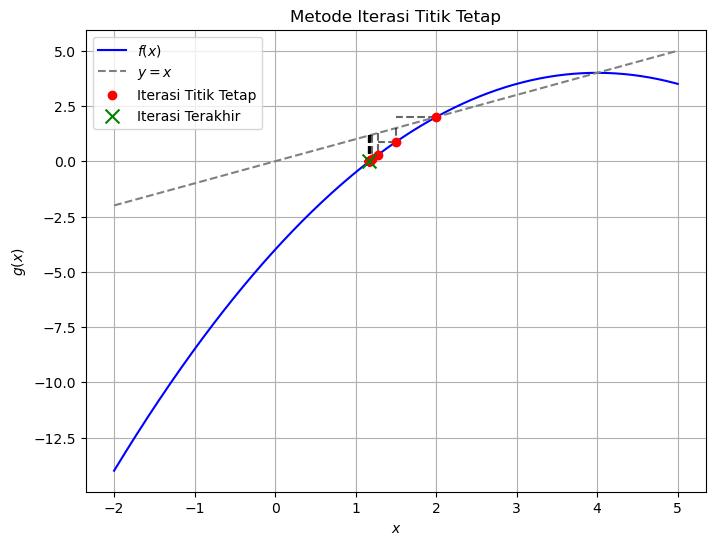

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, h, x0, tol=1e-6, max_iterasi=100):
    iterasi = 0
    nilai_x = [x0]
    selisih = []
    
    while iterasi < max_iterasi:
        x_baru = h(x0)
        error = abs(x_baru - x0)
        nilai_x.append(x_baru)
        selisih.append(error)
        
        if error < tol:
            break
        
        x0 = x_baru
        iterasi += 1
    
    return x_baru, nilai_x, selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, h, nilai_x, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)
    y_f = g(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)
    
    # Tambahkan marker untuk iterasi terakhir
    plt.scatter(nilai_x[-1], g(nilai_x[-1]), color='green', label='Iterasi Terakhir', zorder=6, s=100, marker='x')
    
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$g(x)$')
    plt.title('Metode Iterasi Titik Tetap')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fungsi menampilkan tabel hasil iterasi
def print_iteration_table(nilai_x, selisih):
    iter_nums = np.arange(0, len(nilai_x))
    
    data = {
        'Iterasi': iter_nums,
        'x': nilai_x,
        'Selisih |x - g(x)|': [0] + selisih
    }
    
    df = pd.DataFrame(data)
    print(df)


# Persamaan awal f(x)
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def h(x):
   return 1 + (x**2/8)

# Titik awal
x0 = 2

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, h, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, h, nilai_x, x_range)


    Iterasi         x  Selisih |x - g(x)|
0         0  4.000000        0.000000e+00
1         1  3.000000        1.000000e+00
2         2  2.125000        8.750000e-01
3         3  1.564453        5.605469e-01
4         4  1.305939        2.585139e-01
5         5  1.213185        9.275455e-02
6         6  1.183977        2.920752e-02
7         7  1.175225        8.751895e-03
8         8  1.172644        2.580936e-03
9         9  1.171887        7.574628e-04
10       10  1.171665        2.219869e-04
11       11  1.171600        6.502971e-05
12       12  1.171581        1.904773e-05
13       13  1.171575        5.579034e-06
14       14  1.171574        1.634068e-06
15       15  1.171573        4.786081e-07


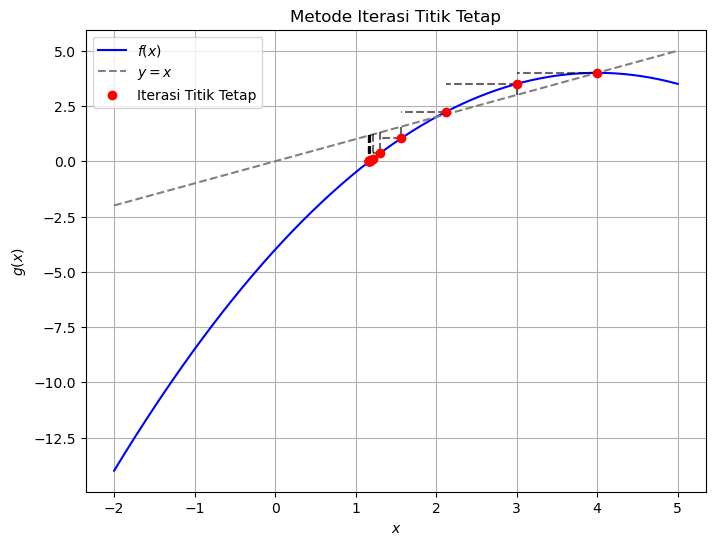

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, h, x0, tol=1e-6, max_iterasi=100):
    # Definisi fungsi dengan parameter:
    # g: fungsi yang ingin diuji untuk titik tetap (tetapi tidak dipakai di dalam tubuh fungsi ini)
    # h: fungsi iterasi yang digunakan untuk menghitung nilai baru dari x (fungsi transformasi)
    # x0: nilai awal dari x
    # tol: toleransi kesalahan yang digunakan untuk menghentikan iterasi ketika perubahan nilai x kecil
    # max_iterasi: jumlah maksimum iterasi yang diperbolehkan
    
    iterasi = 0  # Inisialisasi counter iterasi
    nilai_x = [x0]  # List untuk menyimpan nilai x dari setiap iterasi, dimulai dari nilai awal
    selisih = []  # List untuk menyimpan selisih antara x saat ini dan nilai baru x
    
    while iterasi < max_iterasi:  # Loop iterasi berhenti jika mencapai jumlah maksimum iterasi
        x_baru = h(x0)  # Hitung nilai baru x menggunakan fungsi h
        error = abs(x_baru - x0)  # Hitung selisih antara x baru dan x lama
        nilai_x.append(x_baru)  # Simpan nilai baru dari x ke dalam list nilai_x
        selisih.append(error)  # Simpan selisih antara x dan x baru ke dalam 'selisih'
        
        if error < tol:  # Jika error lebih kecil dari toleransi yang ditentukan, hentikan iterasi
            break
        
        x0 = x_baru  # Perbarui x0 dengan nilai x baru untuk iterasi berikutnya
        iterasi += 1  # Tingkatkan counter iterasi
    
    return x_baru, nilai_x, selisih  # Kembalikan nilai terakhir dari x, daftar semua nilai x, dan daftar selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, h, nilai_x, x_range):
    # Definisi fungsi dengan parameter:
    # g: fungsi yang diuji untuk titik tetap (fungsi yang digambarkan sebagai f(x))
    # h: fungsi iterasi (tidak digunakan di sini, hanya g yang dipakai untuk visualisasi)
    # nilai_x: daftar nilai x hasil iterasi titik tetap
    # x_range: range (batas bawah dan atas) untuk nilai x pada plot
    
    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat 400 titik x secara linier dari batas bawah ke batas atas
    y_f = g(x)  # Hitung nilai fungsi g(x) untuk semua titik x
    
    plt.figure(figsize=(8, 6))  # Membuat kanvas plot dengan ukuran 8x6 inci
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Plot fungsi g(x) dengan garis biru
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')  # Plot garis identitas y=x dengan garis putus-putus abu-abu
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)  
    # Plot titik-titik hasil iterasi sebagai scatter plot merah, hasil iterasi x dan g(x)
    
    # Loop untuk menggambar garis-garis vertikal dan horizontal dari tiap iterasi
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)  
        # Gambar garis vertikal dari (nilai_x[i-1], nilai_x[i-1]) ke (nilai_x[i-1], g(nilai_x[i-1]))
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
        # Gambar garis horizontal dari (nilai_x[i-1], g(nilai_x[i-1])) ke (nilai_x[i], g(nilai_x[i-1]))
    
    plt.xlabel(r'$x$')  # Label sumbu x
    plt.ylabel(r'$g(x)$')  # Label sumbu y
    plt.title('Metode Iterasi Titik Tetap')  # Judul plot
    plt.legend()  # Menampilkan legenda
    plt.grid(True)  # Menambahkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi menampilkan tabel hasil iterasi
def print_iteration_table(nilai_x, selisih):
    # Definisi fungsi dengan parameter:
    # nilai_x: daftar nilai x yang dihasilkan dari setiap iterasi
    # selisih: daftar selisih antara nilai x dan x baru untuk setiap iterasi
    
    iter_nums = np.arange(0, len(nilai_x))  # Buat array berisi angka dari 0 hingga jumlah iterasi (indeks iterasi)
    
    # Buat dictionary yang akan menjadi data untuk DataFrame
    data = {
        'Iterasi': iter_nums,  # Kolom pertama berisi nomor iterasi
        'x': nilai_x,  # Kolom kedua berisi nilai x pada setiap iterasi
        'Selisih |x - g(x)|': [0] + selisih  # Kolom ketiga berisi selisih, mulai dari iterasi pertama (0 pada iterasi awal)
    }
    
    df = pd.DataFrame(data)  # Buat DataFrame dari dictionary di atas
    print(df)  # Cetak DataFrame untuk menampilkan tabel hasil iterasi


# Persamaan awal f(x)
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def h(x):
    # Contoh transformasi untuk mencari fixed point
   return 1 + (x**2/8)

# Titik awal
x0 = 4

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, h, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, h, nilai_x, x_range)


    Iterasi         x  Selisih |x - g(x)|
0         0  4.000000        0.000000e+00
1         1  3.000000        1.000000e+00
2         2  2.125000        8.750000e-01
3         3  1.564453        5.605469e-01
4         4  1.305939        2.585139e-01
5         5  1.213185        9.275455e-02
6         6  1.183977        2.920752e-02
7         7  1.175225        8.751895e-03
8         8  1.172644        2.580936e-03
9         9  1.171887        7.574628e-04
10       10  1.171665        2.219869e-04
11       11  1.171600        6.502971e-05
12       12  1.171581        1.904773e-05
13       13  1.171575        5.579034e-06
14       14  1.171574        1.634068e-06
15       15  1.171573        4.786081e-07


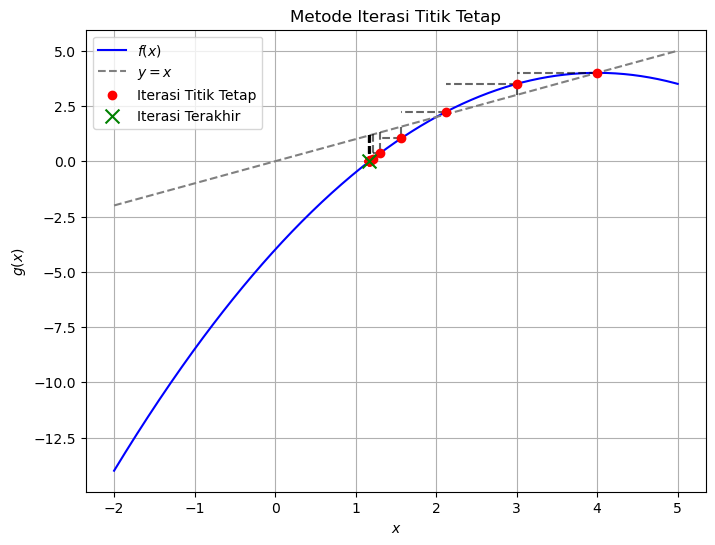

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, h, x0, tol=1e-6, max_iterasi=100):
    iterasi = 0
    nilai_x = [x0]
    selisih = []
    
    while iterasi < max_iterasi:
        x_baru = h(x0)
        error = abs(x_baru - x0)
        nilai_x.append(x_baru)
        selisih.append(error)
        
        if error < tol:
            break
        
        x0 = x_baru
        iterasi += 1
    
    return x_baru, nilai_x, selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, h, nilai_x, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)
    y_f = g(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)
    
    # Tambahkan marker untuk iterasi terakhir
    plt.scatter(nilai_x[-1], g(nilai_x[-1]), color='green', label='Iterasi Terakhir', zorder=6, s=100, marker='x')
    
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$g(x)$')
    plt.title('Metode Iterasi Titik Tetap')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fungsi menampilkan tabel hasil iterasi
def print_iteration_table(nilai_x, selisih):
    iter_nums = np.arange(0, len(nilai_x))
    
    data = {
        'Iterasi': iter_nums,
        'x': nilai_x,
        'Selisih |x - g(x)|': [0] + selisih
    }
    
    df = pd.DataFrame(data)
    print(df)


# Persamaan awal f(x)
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def h(x):
   return 1 + (x**2/8)

# Titik awal
x0 = 4

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, h, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, h, nilai_x, x_range)


    Iterasi         x  Selisih |x - g(x)|
0         0  1.900000        0.000000e+00
1         1  1.451250        4.487500e-01
2         2  1.263266        1.879842e-01
3         3  1.199480        6.378575e-02
4         4  1.179844        1.963601e-02
5         5  1.174004        5.840055e-03
6         6  1.172286        1.718325e-03
7         7  1.171782        5.039611e-04
8         8  1.171634        1.476648e-04
9         9  1.171591        4.325502e-05
10       10  1.171578        1.266953e-05
11       11  1.171574        3.710856e-06
12       12  1.171573        1.086888e-06
13       13  1.171573        3.183423e-07


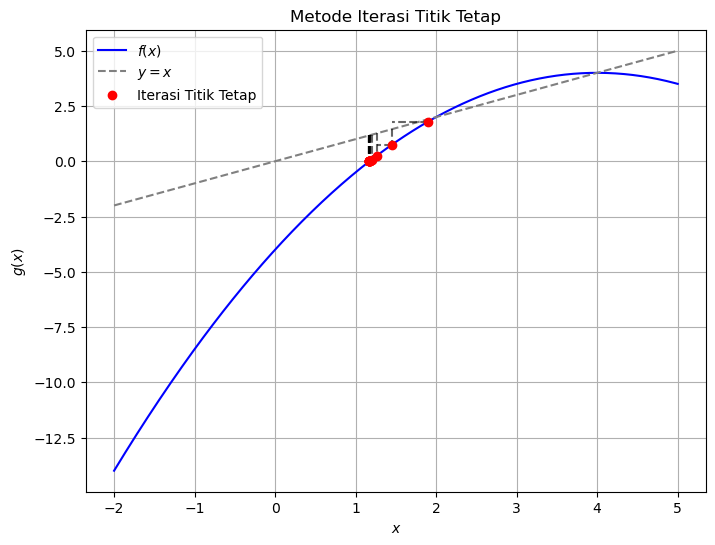

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, h, x0, tol=1e-6, max_iterasi=100):
    # Definisi fungsi dengan parameter:
    # g: fungsi yang ingin diuji untuk titik tetap (tetapi tidak dipakai di dalam tubuh fungsi ini)
    # h: fungsi iterasi yang digunakan untuk menghitung nilai baru dari x (fungsi transformasi)
    # x0: nilai awal dari x
    # tol: toleransi kesalahan yang digunakan untuk menghentikan iterasi ketika perubahan nilai x kecil
    # max_iterasi: jumlah maksimum iterasi yang diperbolehkan
    
    iterasi = 0  # Inisialisasi counter iterasi
    nilai_x = [x0]  # List untuk menyimpan nilai x dari setiap iterasi, dimulai dari nilai awal
    selisih = []  # List untuk menyimpan selisih antara x saat ini dan nilai baru x
    
    while iterasi < max_iterasi:  # Loop iterasi berhenti jika mencapai jumlah maksimum iterasi
        x_baru = g(x0)  # Hitung nilai baru x menggunakan fungsi h
        error = abs(x_baru - x0)  # Hitung selisih antara x baru dan x lama
        nilai_x.append(x_baru)  # Simpan nilai baru dari x ke dalam list nilai_x
        selisih.append(error)  # Simpan selisih antara x dan x baru ke dalam 'selisih'
        
        if error < tol:  # Jika error lebih kecil dari toleransi yang ditentukan, hentikan iterasi
            break
        
        x0 = x_baru  # Perbarui x0 dengan nilai x baru untuk iterasi berikutnya
        iterasi += 1  # Tingkatkan counter iterasi
    
    return x_baru, nilai_x, selisih  # Kembalikan nilai terakhir dari x, daftar semua nilai x, dan daftar selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, h, nilai_x, x_range):
    # Definisi fungsi dengan parameter:
    # g: fungsi yang diuji untuk titik tetap (fungsi yang digambarkan sebagai f(x))
    # h: fungsi iterasi (tidak digunakan di sini, hanya g yang dipakai untuk visualisasi)
    # nilai_x: daftar nilai x hasil iterasi titik tetap
    # x_range: range (batas bawah dan atas) untuk nilai x pada plot
    
    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat 400 titik x secara linier dari batas bawah ke batas atas
    y_f = g(x)  # Hitung nilai fungsi g(x) untuk semua titik x
    
    plt.figure(figsize=(8, 6))  # Membuat kanvas plot dengan ukuran 8x6 inci
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Plot fungsi g(x) dengan garis biru
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')  # Plot garis identitas y=x dengan garis putus-putus abu-abu
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)  
    # Plot titik-titik hasil iterasi sebagai scatter plot merah, hasil iterasi x dan g(x)
    
    # Loop untuk menggambar garis-garis vertikal dan horizontal dari tiap iterasi
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)  
        # Gambar garis vertikal dari (nilai_x[i-1], nilai_x[i-1]) ke (nilai_x[i-1], g(nilai_x[i-1]))
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
        # Gambar garis horizontal dari (nilai_x[i-1], g(nilai_x[i-1])) ke (nilai_x[i], g(nilai_x[i-1]))
    
    plt.xlabel(r'$x$')  # Label sumbu x
    plt.ylabel(r'$g(x)$')  # Label sumbu y
    plt.title('Metode Iterasi Titik Tetap')  # Judul plot
    plt.legend()  # Menampilkan legenda
    plt.grid(True)  # Menambahkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi menampilkan tabel hasil iterasi
def print_iteration_table(nilai_x, selisih):
    # Definisi fungsi dengan parameter:
    # nilai_x: daftar nilai x yang dihasilkan dari setiap iterasi
    # selisih: daftar selisih antara nilai x dan x baru untuk setiap iterasi
    
    iter_nums = np.arange(0, len(nilai_x))  # Buat array berisi angka dari 0 hingga jumlah iterasi (indeks iterasi)
    
    # Buat dictionary yang akan menjadi data untuk DataFrame
    data = {
        'Iterasi': iter_nums,  # Kolom pertama berisi nomor iterasi
        'x': nilai_x,  # Kolom kedua berisi nilai x pada setiap iterasi
        'Selisih |x - g(x)|': [0] + selisih  # Kolom ketiga berisi selisih, mulai dari iterasi pertama (0 pada iterasi awal)
    }
    
    df = pd.DataFrame(data)  # Buat DataFrame dari dictionary di atas
    print(df)  # Cetak DataFrame untuk menampilkan tabel hasil iterasi


# Persamaan awal f(x)
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def h(x):
    # Contoh transformasi untuk mencari fixed point
    return 1 + (x**2/8)

# Titik awal
x0 = 1.9

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, h, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, h, nilai_x, x_range)


    Iterasi         x  Selisih |x - g(x)|
0         0  1.900000        0.000000e+00
1         1  1.451250        4.487500e-01
2         2  1.263266        1.879842e-01
3         3  1.199480        6.378575e-02
4         4  1.179844        1.963601e-02
5         5  1.174004        5.840055e-03
6         6  1.172286        1.718325e-03
7         7  1.171782        5.039611e-04
8         8  1.171634        1.476648e-04
9         9  1.171591        4.325502e-05
10       10  1.171578        1.266953e-05
11       11  1.171574        3.710856e-06
12       12  1.171573        1.086888e-06
13       13  1.171573        3.183423e-07


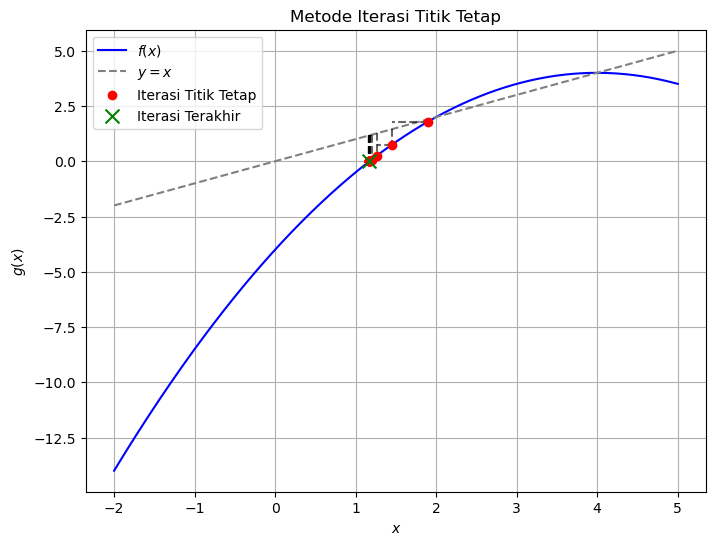

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, h, x0, tol=1e-6, max_iterasi=100):
    iterasi = 0
    nilai_x = [x0]
    selisih = []
    
    while iterasi < max_iterasi:
        x_baru = h(x0)
        error = abs(x_baru - x0)
        nilai_x.append(x_baru)
        selisih.append(error)
        
        if error < tol:
            break
        
        x0 = x_baru
        iterasi += 1
    
    return x_baru, nilai_x, selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, h, nilai_x, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)
    y_f = g(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)
    
    # Tambahkan marker untuk iterasi terakhir
    plt.scatter(nilai_x[-1], g(nilai_x[-1]), color='green', label='Iterasi Terakhir', zorder=6, s=100, marker='x')
    
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$g(x)$')
    plt.title('Metode Iterasi Titik Tetap')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fungsi menampilkan tabel hasil iterasi
def print_iteration_table(nilai_x, selisih):
    iter_nums = np.arange(0, len(nilai_x))
    
    data = {
        'Iterasi': iter_nums,
        'x': nilai_x,
        'Selisih |x - g(x)|': [0] + selisih
    }
    
    df = pd.DataFrame(data)
    print(df)


# Persamaan awal f(x)
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def h(x):
   return 1 + (x**2/8)

# Titik awal
x0 = 1.9

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, h, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, h, nilai_x, x_range)


    Iterasi         x  Selisih |x - g(x)|
0         0  3.800000        0.000000e+00
1         1  2.805000        9.950000e-01
2         2  1.983503        8.214969e-01
3         3  1.491786        4.917175e-01
4         4  1.278178        2.136076e-01
5         5  1.204217        7.396064e-02
6         6  1.181267        2.294995e-02
7         7  1.174424        6.843343e-03
8         8  1.172409        2.015101e-03
9         9  1.171818        5.911381e-04
10       10  1.171645        1.732202e-04
11       11  1.171594        5.074189e-05
12       12  1.171579        1.486254e-05
13       13  1.171575        4.353189e-06
14       14  1.171573        1.275024e-06
15       15  1.171573        3.734462e-07
16       16  1.171573        1.093799e-07
17       17  1.171573        3.203663e-08
18       18  1.171573        9.383313e-09


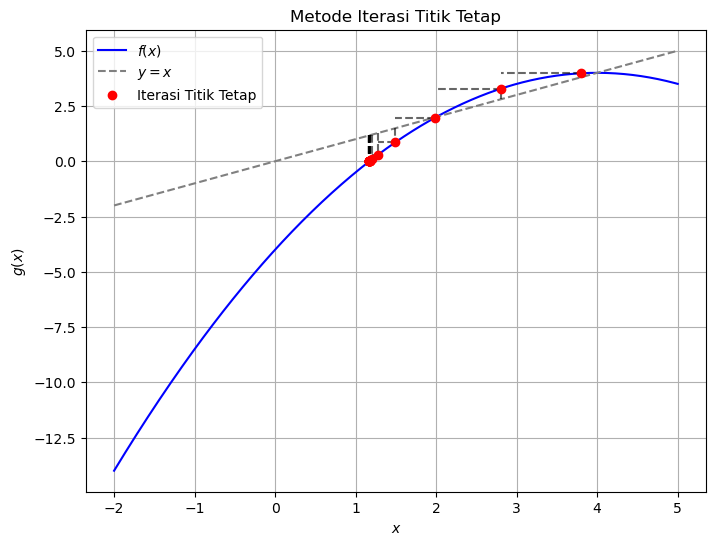

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, h, x0, tol=1e-8, max_iterasi=100):
    # Definisi fungsi dengan parameter:
    # g: fungsi yang ingin diuji untuk titik tetap (tetapi tidak dipakai di dalam tubuh fungsi ini)
    # h: fungsi iterasi yang digunakan untuk menghitung nilai baru dari x (fungsi transformasi)
    # x0: nilai awal dari x
    # tol: toleransi kesalahan yang digunakan untuk menghentikan iterasi ketika perubahan nilai x kecil
    # max_iterasi: jumlah maksimum iterasi yang diperbolehkan
    
    iterasi = 0  # Inisialisasi counter iterasi
    nilai_x = [x0]  # List untuk menyimpan nilai x dari setiap iterasi, dimulai dari nilai awal
    selisih = []  # List untuk menyimpan selisih antara x saat ini dan nilai baru x
    
    while iterasi < max_iterasi:  # Loop iterasi berhenti jika mencapai jumlah maksimum iterasi
        x_baru = h(x0)  # Hitung nilai baru x menggunakan fungsi h
        error = abs(x_baru - x0)  # Hitung selisih antara x baru dan x lama
        nilai_x.append(x_baru)  # Simpan nilai baru dari x ke dalam list nilai_x
        selisih.append(error)  # Simpan selisih antara x dan x baru ke dalam 'selisih'
        
        if error < tol:  # Jika error lebih kecil dari toleransi yang ditentukan, hentikan iterasi
            break
        
        x0 = x_baru  # Perbarui x0 dengan nilai x baru untuk iterasi berikutnya
        iterasi += 1  # Tingkatkan counter iterasi
    
    return x_baru, nilai_x, selisih  # Kembalikan nilai terakhir dari x, daftar semua nilai x, dan daftar selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, h, nilai_x, x_range):
    # Definisi fungsi dengan parameter:
    # g: fungsi yang diuji untuk titik tetap (fungsi yang digambarkan sebagai f(x))
    # h: fungsi iterasi (tidak digunakan di sini, hanya g yang dipakai untuk visualisasi)
    # nilai_x: daftar nilai x hasil iterasi titik tetap
    # x_range: range (batas bawah dan atas) untuk nilai x pada plot
    
    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat 400 titik x secara linier dari batas bawah ke batas atas
    y_f = g(x)  # Hitung nilai fungsi g(x) untuk semua titik x
    
    plt.figure(figsize=(8, 6))  # Membuat kanvas plot dengan ukuran 8x6 inci
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Plot fungsi g(x) dengan garis biru
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')  # Plot garis identitas y=x dengan garis putus-putus abu-abu
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)  
    # Plot titik-titik hasil iterasi sebagai scatter plot merah, hasil iterasi x dan g(x)
    
    # Loop untuk menggambar garis-garis vertikal dan horizontal dari tiap iterasi
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)  
        # Gambar garis vertikal dari (nilai_x[i-1], nilai_x[i-1]) ke (nilai_x[i-1], g(nilai_x[i-1]))
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
        # Gambar garis horizontal dari (nilai_x[i-1], g(nilai_x[i-1])) ke (nilai_x[i], g(nilai_x[i-1]))
    
    plt.xlabel(r'$x$')  # Label sumbu x
    plt.ylabel(r'$g(x)$')  # Label sumbu y
    plt.title('Metode Iterasi Titik Tetap')  # Judul plot
    plt.legend()  # Menampilkan legenda
    plt.grid(True)  # Menambahkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi menampilkan tabel hasil iterasi
def print_iteration_table(nilai_x, selisih):
    # Definisi fungsi dengan parameter:
    # nilai_x: daftar nilai x yang dihasilkan dari setiap iterasi
    # selisih: daftar selisih antara nilai x dan x baru untuk setiap iterasi
    
    iter_nums = np.arange(0, len(nilai_x))  # Buat array berisi angka dari 0 hingga jumlah iterasi (indeks iterasi)
    
    # Buat dictionary yang akan menjadi data untuk DataFrame
    data = {
        'Iterasi': iter_nums,  # Kolom pertama berisi nomor iterasi
        'x': nilai_x,  # Kolom kedua berisi nilai x pada setiap iterasi
        'Selisih |x - g(x)|': [0] + selisih  # Kolom ketiga berisi selisih, mulai dari iterasi pertama (0 pada iterasi awal)
    }
    
    df = pd.DataFrame(data)  # Buat DataFrame dari dictionary di atas
    print(df)  # Cetak DataFrame untuk menampilkan tabel hasil iterasi


# Persamaan awal f(x)
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def h(x):
    # Contoh transformasi untuk mencari fixed point
    return 1 + (x**2/8)

# Titik awal
x0 = 3.8

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, h, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, h, nilai_x, x_range)


    Iterasi         x  Selisih |x - g(x)|
0         0  3.800000        0.000000e+00
1         1  2.805000        9.950000e-01
2         2  1.983503        8.214969e-01
3         3  1.491786        4.917175e-01
4         4  1.278178        2.136076e-01
5         5  1.204217        7.396064e-02
6         6  1.181267        2.294995e-02
7         7  1.174424        6.843343e-03
8         8  1.172409        2.015101e-03
9         9  1.171818        5.911381e-04
10       10  1.171645        1.732202e-04
11       11  1.171594        5.074189e-05
12       12  1.171579        1.486254e-05
13       13  1.171575        4.353189e-06
14       14  1.171573        1.275024e-06
15       15  1.171573        3.734462e-07


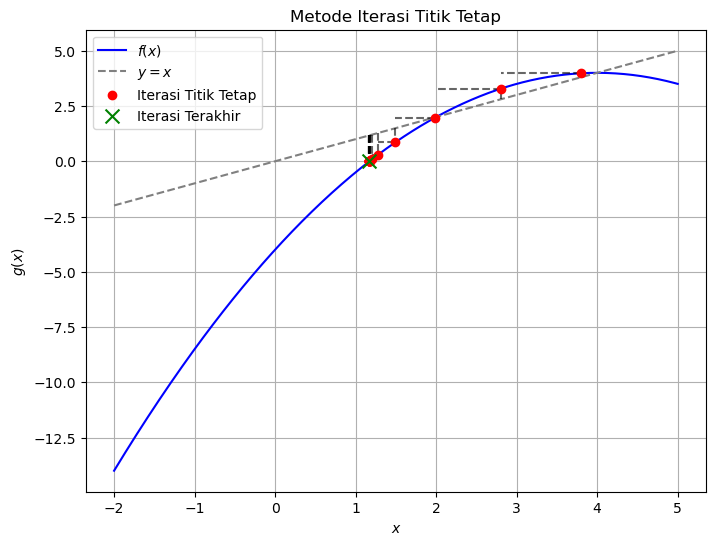

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, h, x0, tol=1e-6, max_iterasi=100):
    iterasi = 0
    nilai_x = [x0]
    selisih = []
    
    while iterasi < max_iterasi:
        x_baru = h(x0)
        error = abs(x_baru - x0)
        nilai_x.append(x_baru)
        selisih.append(error)
        
        if error < tol:
            break
        
        x0 = x_baru
        iterasi += 1
    
    return x_baru, nilai_x, selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, h, nilai_x, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)
    y_f = g(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)
    
    # Tambahkan marker untuk iterasi terakhir
    plt.scatter(nilai_x[-1], g(nilai_x[-1]), color='green', label='Iterasi Terakhir', zorder=6, s=100, marker='x')
    
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$g(x)$')
    plt.title('Metode Iterasi Titik Tetap')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fungsi menampilkan tabel hasil iterasi
def print_iteration_table(nilai_x, selisih):
    iter_nums = np.arange(0, len(nilai_x))
    
    data = {
        'Iterasi': iter_nums,
        'x': nilai_x,
        'Selisih |x - g(x)|': [0] + selisih
    }
    
    df = pd.DataFrame(data)
    print(df)


# Persamaan awal f(x)
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def h(x):
   return 1 + (x**2/8)

# Titik awal
x0 = 3.8

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, h, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, h, nilai_x, x_range)


    Iterasi         x  Selisih |x - g(x)|  Error Relatif
0         0  1.900000        0.000000e+00   0.000000e+00
1         1  1.451250        4.487500e-01   3.092162e-01
2         2  1.263266        1.879842e-01   1.488081e-01
3         3  1.199480        6.378575e-02   5.317784e-02
4         4  1.179844        1.963601e-02   1.664289e-02
5         5  1.174004        5.840055e-03   4.974476e-03
6         6  1.172286        1.718325e-03   1.465791e-03
7         7  1.171782        5.039611e-04   4.300810e-04
8         8  1.171634        1.476648e-04   1.260332e-04
9         9  1.171591        4.325502e-05   3.691990e-05
10       10  1.171578        1.266953e-05   1.081407e-05
11       11  1.171574        3.710856e-06   3.167409e-06
12       12  1.171573        1.086888e-06   9.277162e-07
13       13  1.171573        3.183423e-07   2.717221e-07


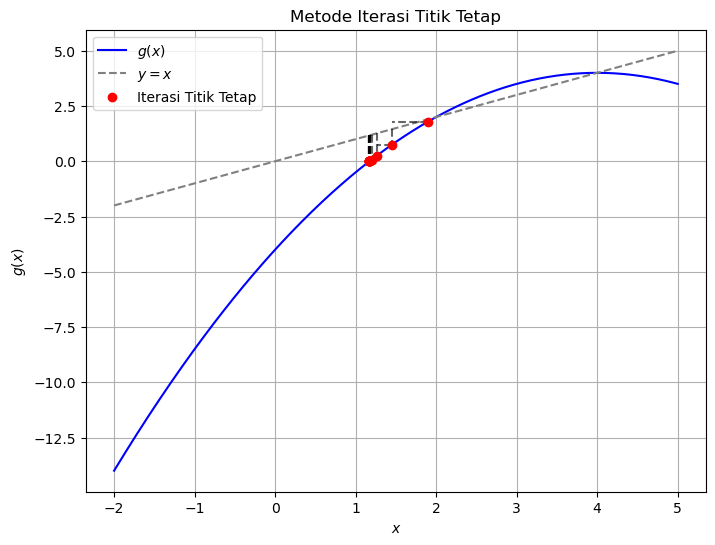

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, h, x0, tol=1e-6, max_iterasi=100):
    iterasi = 0
    nilai_x = [x0]
    selisih = []
    
    while iterasi < max_iterasi:
        x_baru = h(x0)
        error = abs(x_baru - x0)
        nilai_x.append(x_baru)
        selisih.append(error)
        
        if error < tol:
            break
        
        x0 = x_baru
        iterasi += 1
    
    return x_baru, nilai_x, selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, h, nilai_x, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)
    y_f = g(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_f, label=r'$g(x)$', color='blue')
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)
    
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$g(x)$')
    plt.title('Metode Iterasi Titik Tetap')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fungsi menampilkan tabel hasil iterasi dengan error relatif
def print_iteration_table(nilai_x, selisih):
    # Buat array untuk nomor iterasi, dari 0 hingga panjang nilai_x (jumlah iterasi)
    iter_nums = np.arange(0, len(nilai_x))
    
    # Menghitung error relatif, kecuali untuk iterasi pertama
    error_relatif = [0]  # Pada iterasi pertama, error relatif dianggap 0 karena tidak ada nilai sebelumnya untuk dihitung
    for i in range(1, len(nilai_x)):  # Mulai perhitungan error relatif dari iterasi kedua
        if abs(nilai_x[i]) > 0:  # Jika nilai x[i] tidak sama dengan nol (untuk menghindari pembagian dengan nol)
            # Menghitung error relatif dengan formula |x_i - x_(i-1)| / |x_i|
            error_relatif.append(abs(nilai_x[i] - nilai_x[i-1]) / abs(nilai_x[i]))
        else:
            # Jika x[i] nol, masukkan np.nan untuk menghindari pembagian dengan nol
            error_relatif.append(np.nan)
    
    # Membuat dictionary untuk membentuk DataFrame
    data = {
        'Iterasi': iter_nums,  # Kolom nomor iterasi
        'x': nilai_x,  # Kolom nilai x untuk setiap iterasi
        'Selisih |x - g(x)|': [0] + selisih,  # Kolom untuk menyimpan selisih antara nilai x saat ini dan iterasi sebelumnya
        'Error Relatif': error_relatif  # Kolom untuk menyimpan nilai error relatif yang sudah dihitung
    }
    
    # Membuat DataFrame dari dictionary 'data'
    df = pd.DataFrame(data)
    
    # Mencetak DataFrame sebagai tabel hasil iterasi
    print(df)


# Persamaan awal f(x)
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def h(x):
    return 1 + (x**2 / 8)

# Titik awal
x0 = 1.9

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, h, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, h, nilai_x, x_range)


    Iterasi         x  Selisih |x - g(x)|  Error Relatif
0         0  3.800000        0.000000e+00   0.000000e+00
1         1  2.805000        9.950000e-01   3.547237e-01
2         2  1.983503        8.214969e-01   4.141646e-01
3         3  1.491786        4.917175e-01   3.296168e-01
4         4  1.278178        2.136076e-01   1.671188e-01
5         5  1.204217        7.396064e-02   6.141802e-02
6         6  1.181267        2.294995e-02   1.942824e-02
7         7  1.174424        6.843343e-03   5.826978e-03
8         8  1.172409        2.015101e-03   1.718769e-03
9         9  1.171818        5.911381e-04   5.044625e-04
10       10  1.171645        1.732202e-04   1.478437e-04
11       11  1.171594        5.074189e-05   4.331014e-05
12       12  1.171579        1.486254e-05   1.268591e-05
13       13  1.171575        4.353189e-06   3.715673e-06
14       14  1.171573        1.275024e-06   1.088300e-06
15       15  1.171573        3.734462e-07   3.187562e-07


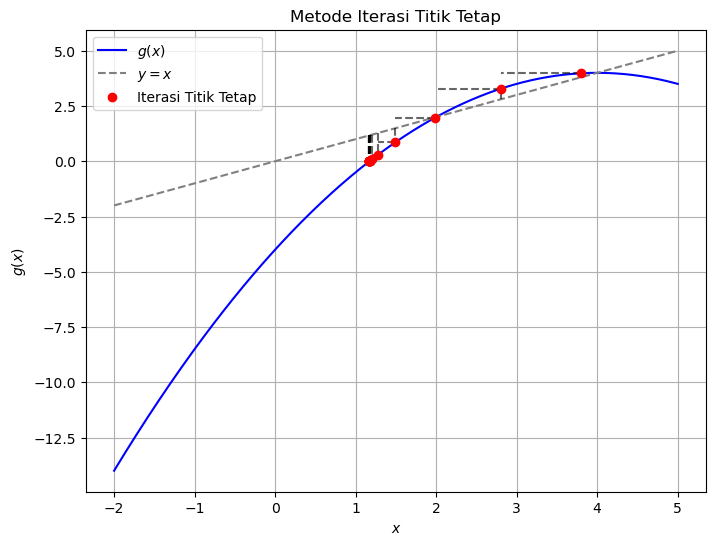

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, h, x0, tol=1e-6, max_iterasi=100):
    iterasi = 0
    nilai_x = [x0]
    selisih = []
    
    while iterasi < max_iterasi:
        x_baru = h(x0)
        error = abs(x_baru - x0)
        nilai_x.append(x_baru)
        selisih.append(error)
        
        if error < tol:
            break
        
        x0 = x_baru
        iterasi += 1
    
    return x_baru, nilai_x, selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, h, nilai_x, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)
    y_f = g(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_f, label=r'$g(x)$', color='blue')
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)
    
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$g(x)$')
    plt.title('Metode Iterasi Titik Tetap')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fungsi menampilkan tabel hasil iterasi dengan error relatif
def print_iteration_table(nilai_x, selisih):
    iter_nums = np.arange(0, len(nilai_x))
    
    # Menghitung error relatif, kecuali untuk iterasi pertama
    error_relatif = [0]  # Pada iterasi pertama, error relatif dianggap 0
    for i in range(1, len(nilai_x)):
        if abs(nilai_x[i]) > 0:
            error_relatif.append(abs(nilai_x[i] - nilai_x[i-1]) / abs(nilai_x[i]))
        else:
            error_relatif.append(np.nan)  # Untuk menghindari pembagian dengan nol
    
    data = {
        'Iterasi': iter_nums,
        'x': nilai_x,
        'Selisih |x - g(x)|': [0] + selisih,
        'Error Relatif': error_relatif
    }
    
    df = pd.DataFrame(data)
    print(df)

# Persamaan awal f(x)
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def h(x):
    return 1 + (x**2 / 8)

# Titik awal
x0 = 3.8

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, h, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, h, nilai_x, x_range)


Conclusion dari theorema 2.3 (Fixed-Point Theorem)

#

#

    Iterasi         x  Selisih |x - g(x)|
0         0 -2.000000        0.000000e+00
1         1  0.500000        2.500000e+00
2         2  0.968750        4.687500e-01
3         3  0.882690        8.605957e-02
4         4  0.902607        1.991677e-02
5         5  0.898163        4.444671e-03
6         6  0.899163        1.000479e-03
7         7  0.898938        2.247732e-04
8         8  0.898989        5.052062e-05
9         9  0.898977        1.135405e-05
10       10  0.898980        2.551774e-06
11       11  0.898979        5.734977e-07


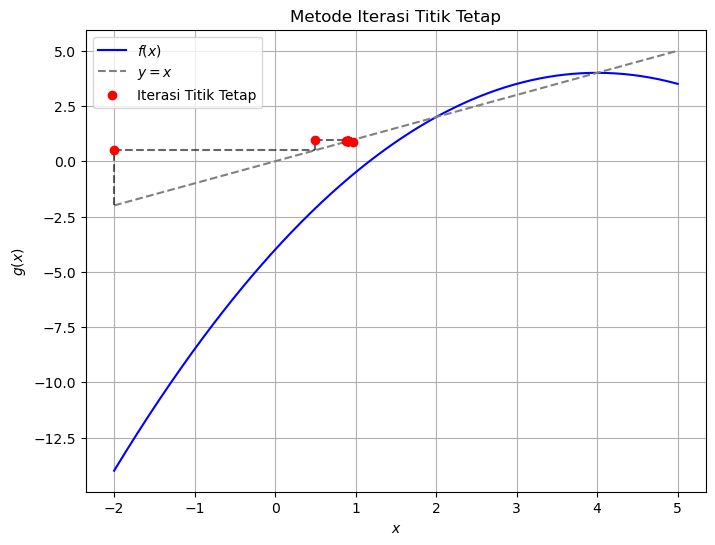

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(f, g, x0, tol=1e-6, max_iter=100):
    iter_count = 0
    x_values = [x0]
    diff_values = []  # Untuk menyimpan selisih antara x dan g(x)
    
    while iter_count < max_iter:
        x_new = g(x0)
        diff = abs(x_new - x0)
        x_values.append(x_new)
        diff_values.append(diff)
        
        if diff < tol:
            break
        
        x0 = x_new
        iter_count += 1
    
    return x_new, x_values, diff_values

# Fungsi untuk plotting hasil iterasi
def plot_fixed_point(f, g, x_values, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)
    y_f = f(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')
    plt.scatter(x_values, [g(x) for x in x_values], color='red', label='Iterasi Titik Tetap', zorder=5)
    
    # Plot garis dari tiap iterasi
    for i in range(1, len(x_values)):
        plt.plot([x_values[i-1], x_values[i-1]], [x_values[i-1], g(x_values[i-1])], 'k--', alpha=0.6)
        plt.plot([x_values[i-1], x_values[i]], [g(x_values[i-1]), g(x_values[i-1])], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$g(x)$')
    plt.title('Metode Iterasi Titik Tetap')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fungsi untuk menampilkan tabel hasil iterasi
def print_iteration_table(x_values, diff_values):
    iter_nums = np.arange(0, len(x_values))
    data = {
        'Iterasi': iter_nums,
        'x': x_values,
        'Selisih |x - g(x)|': [0] + diff_values  # Selisih dimulai dari iterasi ke-1
    }
    df = pd.DataFrame(data)
    print(df)

# Persamaan awal f(x)
def f(x):
    return -4 + 4 * x - (x**2 / 2)

# Persamaan titik tetap g(x) yang merupakan transformasi dari f(x)
def g(x):
    # Contoh transformasi untuk mencari fixed point
    return (4 - (x**2 / 2)) / 4

# Titik awal
x0 = -2

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, x_values, diff_values = fixed_point_iteration(f, g, x0)

# Menampilkan tabel iterasi
print_iteration_table(x_values, diff_values)

# Plotting hasil iterasi
plot_fixed_point(f, g, x_values, x_range)


   Iterasi       x  Selisih |x - g(x)|
0        0  3.8000        0.000000e+00
1        1  3.9800        1.800000e-01
2        2  3.9998        1.980000e-02
3        3  4.0000        1.999800e-04
4        4  4.0000        2.000000e-08


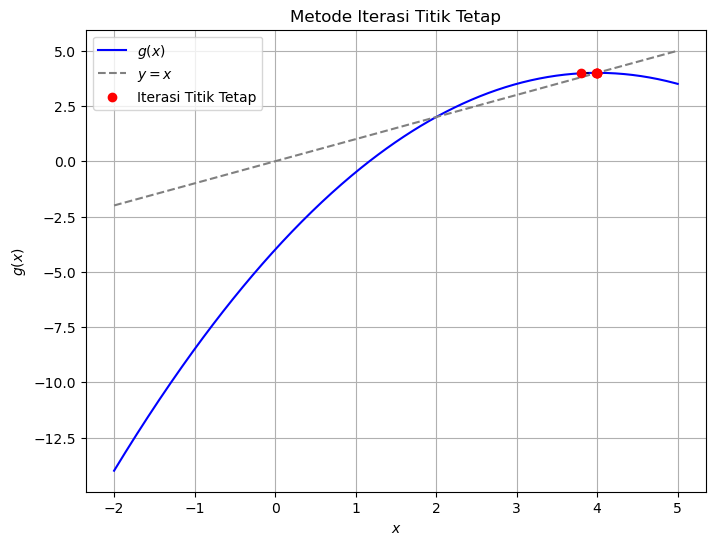

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Iterasi Titik Tetap
def fixed_point_iteration(g, x0, tol=1e-6, max_iterasi=100):
    # Definisi fungsi dengan parameter:
    # g: fungsi yang diuji untuk titik tetap
    # x0: nilai awal dari x
    # tol: toleransi kesalahan yang digunakan untuk menghentikan iterasi ketika perubahan nilai x kecil
    # max_iterasi: jumlah maksimum iterasi yang diperbolehkan
    
    iterasi = 0  # Inisialisasi counter iterasi
    nilai_x = [x0]  # List untuk menyimpan nilai x dari setiap iterasi, dimulai dari nilai awal
    selisih = []  # List untuk menyimpan selisih antara x saat ini dan nilai baru x
    
    while iterasi < max_iterasi:  # Loop iterasi berhenti jika mencapai jumlah maksimum iterasi
        x_baru = g(x0)  # Hitung nilai baru x menggunakan fungsi g
        error = abs(x_baru - x0)  # Hitung selisih antara x baru dan x lama
        nilai_x.append(x_baru)  # Simpan nilai baru dari x ke dalam list nilai_x
        selisih.append(error)  # Simpan selisih antara x dan x baru ke dalam 'selisih'
        
        if error < tol:  # Jika error lebih kecil dari toleransi yang ditentukan, hentikan iterasi
            break
        
        x0 = x_baru  # Perbarui x0 dengan nilai x baru untuk iterasi berikutnya
        iterasi += 1  # Tingkatkan counter iterasi
    
    return x_baru, nilai_x, selisih  # Kembalikan nilai terakhir dari x, daftar semua nilai x, dan daftar selisih

# Fungsi plotting data ke dalam kurva
def plot_fixed_point(g, nilai_x, x_range):
    # Definisi fungsi dengan parameter:
    # g: fungsi yang diuji untuk titik tetap (fungsi yang digambarkan sebagai f(x))
    # nilai_x: daftar nilai x hasil iterasi titik tetap
    # x_range: range (batas bawah dan atas) untuk nilai x pada plot
    
    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat 400 titik x secara linier dari batas bawah ke batas atas
    y_f = g(x)  # Hitung nilai fungsi g(x) untuk semua titik x
    
    plt.figure(figsize=(8, 6))  # Membuat kanvas plot dengan ukuran 8x6 inci
    plt.plot(x, y_f, label=r'$g(x)$', color='blue')  # Plot fungsi g(x) dengan garis biru
    plt.plot(x, x, label=r'$y=x$', color='gray', linestyle='--')  # Plot garis identitas y=x dengan garis putus-putus abu-abu
    plt.scatter(nilai_x, [g(x) for x in nilai_x], color='red', label='Iterasi Titik Tetap', zorder=5)  
    # Plot titik-titik hasil iterasi sebagai scatter plot merah, hasil iterasi x dan g(x)
    
    # Loop untuk menggambar garis-garis vertikal dan horizontal dari tiap iterasi
    for i in range(1, len(nilai_x)):
        plt.plot([nilai_x[i-1], nilai_x[i-1]], [nilai_x[i-1], g(nilai_x[i-1])], 'k--', alpha=0.6)  
        # Gambar garis vertikal dari (nilai_x[i-1], nilai_x[i-1]) ke (nilai_x[i-1], g(nilai_x[i-1]))
        plt.plot([nilai_x[i-1], nilai_x[i]], [g(nilai_x[i-1]), g(nilai_x[i-1])], 'k--', alpha=0.6)
        # Gambar garis horizontal dari (nilai_x[i-1], g(nilai_x[i-1])) ke (nilai_x[i], g(nilai_x[i-1]))
    
    plt.xlabel(r'$x$')  # Label sumbu x
    plt.ylabel(r'$g(x)$')  # Label sumbu y
    plt.title('Metode Iterasi Titik Tetap')  # Judul plot
    plt.legend()  # Menampilkan legenda
    plt.grid(True)  # Menambahkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi menampilkan tabel hasil iterasi
def print_iteration_table(nilai_x, selisih):
    # Definisi fungsi dengan parameter:
    # nilai_x: daftar nilai x yang dihasilkan dari setiap iterasi
    # selisih: daftar selisih antara nilai x dan x baru untuk setiap iterasi
    
    iter_nums = np.arange(0, len(nilai_x))  # Buat array berisi angka dari 0 hingga jumlah iterasi (indeks iterasi)
    
    # Buat dictionary yang akan menjadi data untuk DataFrame
    data = {
        'Iterasi': iter_nums,  # Kolom pertama berisi nomor iterasi
        'x': nilai_x,  # Kolom kedua berisi nilai x pada setiap iterasi
        'Selisih |x - g(x)|': [0] + selisih  # Kolom ketiga berisi selisih, mulai dari iterasi pertama (0 pada iterasi awal)
    }
    
    df = pd.DataFrame(data)  # Buat DataFrame dari dictionary di atas
    print(df)  # Cetak DataFrame untuk menampilkan tabel hasil iterasi


# Persamaan awal g(x) yang diuji
def g(x):
    return -4 + 4 * x - (x**2 / 2)

# Titik awal
x0 = 3.8

# Rentang untuk plotting
x_range = [-2, 5]

# Melakukan iterasi titik tetap
x_fixed, nilai_x, selisih = fixed_point_iteration(g, x0)

# Menampilkan tabel iterasi
print_iteration_table(nilai_x, selisih)

# Plotting hasil iterasi
plot_fixed_point(g, nilai_x, x_range)
